# My First Kaggle InClass Competition

**Importing The Libraries**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras import regularizers

**Loading The Data**

In [11]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample.csv')
df.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


**Visualizing The Important Features**

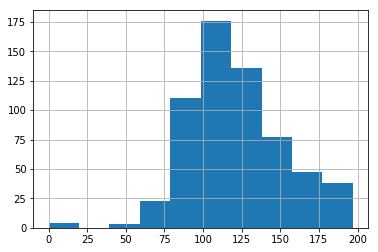

In [12]:
df.glucose_concentration.hist()
plt.show()

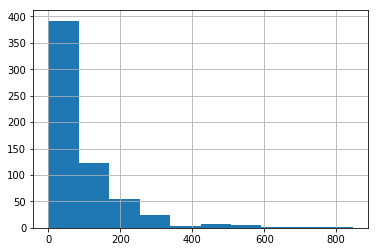

In [13]:
df.serum_insulin.hist()
plt.show()

**Since there were a lot features with high magnitude and it was causing high variance/Overfitting on the training data, I decided to Scale the features in the range of 0 to 1 using Min-Max_scaler.**

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
#Scaling The Training Data
x = df.values
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
#Scaling The Testing Data
y = test.values
y_scaled = min_max_scaler.fit_transform(y)
test = pd.DataFrame(y_scaled)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.410691,0.117647,0.568528,0.596491,0.349206,0.111111,0.574074,0.101196,0.083333,0.0
1,0.031291,0.647059,0.725888,0.824561,0.523810,0.172577,0.616162,0.075149,0.500000,1.0
2,0.924381,0.117647,0.472081,0.561404,0.507937,0.189125,0.639731,0.254483,0.033333,1.0
3,0.856584,0.058824,0.609137,0.701754,0.761905,0.236407,0.654882,0.462852,0.333333,0.0
4,0.705346,0.176471,0.649746,0.631579,0.396825,0.224586,0.545455,0.201110,0.100000,1.0


**Visualizing The Important Features After Scaling**

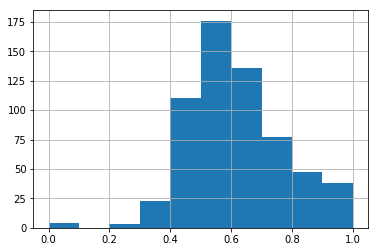

In [15]:
df[2].hist() #Glucose Concentration
plt.show()

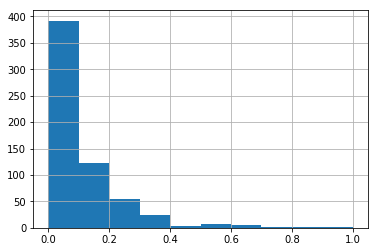

In [16]:
df[5].hist() #Serum Insulin
plt.show()

**Spliting the training data into Traning and Developement Data**

In [17]:
train, dev = train_test_split(df, test_size=0.2)

**Setting Up the Hyperparameters**

In [18]:
hidden_units=300
learning_rate=0.005 #Learning rate was quite optimal
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=100 #Increasing The epochs would overfit
bsize = 128 #Batch Size Of 128 

**Model Architechture**

In [53]:
model = Sequential()

model.add(Dense(hidden_units, input_dim=8, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

**Setting Up loss function, Optimizer, Metrics**

In [54]:
adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['acc'])

**Training the Model**

In [55]:
train_x=train.iloc[:,1:9]
train_y=train.iloc[:,9]

model.fit(train_x, train_y, epochs=no_epochs, batch_size= bsize,  verbose=2)

Epoch 1/100
 - 1s - loss: 0.7526 - acc: 0.6008
Epoch 2/100
 - 0s - loss: 0.6437 - acc: 0.6599
Epoch 3/100
 - 0s - loss: 0.6138 - acc: 0.6680
Epoch 4/100
 - 0s - loss: 0.6014 - acc: 0.6925
Epoch 5/100
 - 0s - loss: 0.5774 - acc: 0.6925
Epoch 6/100
 - 0s - loss: 0.5524 - acc: 0.7067
Epoch 7/100
 - 0s - loss: 0.5294 - acc: 0.7658
Epoch 8/100
 - 0s - loss: 0.5118 - acc: 0.7637
Epoch 9/100
 - 0s - loss: 0.5070 - acc: 0.7495
Epoch 10/100
 - 0s - loss: 0.5012 - acc: 0.7739
Epoch 11/100
 - 0s - loss: 0.4789 - acc: 0.7800
Epoch 12/100
 - 0s - loss: 0.4709 - acc: 0.7902
Epoch 13/100
 - 0s - loss: 0.4779 - acc: 0.7719
Epoch 14/100
 - 0s - loss: 0.4748 - acc: 0.7719
Epoch 15/100
 - 0s - loss: 0.4778 - acc: 0.7963
Epoch 16/100
 - 0s - loss: 0.4657 - acc: 0.7719
Epoch 17/100
 - 0s - loss: 0.4681 - acc: 0.8045
Epoch 18/100
 - 0s - loss: 0.4590 - acc: 0.7760
Epoch 19/100
 - 0s - loss: 0.4478 - acc: 0.8045
Epoch 20/100
 - 0s - loss: 0.4569 - acc: 0.7963
Epoch 21/100
 - 0s - loss: 0.4496 - acc: 0.7882
E

**Validation Loss and Accuracy**

In [56]:
val_loss, val_acc = model.evaluate(dev.iloc[:,1:9], dev.iloc[:,9])
print("Validation Loss : ", val_loss)
print("Validation Acc : ",val_acc)

123/123 [==============================] - 0s 2ms/step
Validation Loss :  0.6446438722494172
Validation Acc :  0.7154471554407259


**Low Bias and Low Variance ** : 
Compared to the highest accuracy this model performed well on training data(Low Bias) and gave a equivalent accuracy on the validation set (Low Variance)

**Predicting The outputs for the Training Data**

In [57]:
test_x=test.iloc[:,1:9]
predictions = model.predict(test_x)
print(predictions)

[[5.43629885e-01]
 [3.29973847e-01]
 [4.25788224e-01]
 [4.45285082e-01]
 [9.65522602e-02]
 [1.85475558e-01]
 [8.04983079e-01]
 [2.04827964e-01]
 [5.83549961e-02]
 [1.36937918e-02]
 [7.85698533e-01]
 [1.03782333e-01]
 [8.08525741e-01]
 [5.18844128e-02]
 [4.82654899e-01]
 [2.16680408e-01]
 [7.38748983e-02]
 [3.93675342e-02]
 [5.31747699e-01]
 [7.42176890e-01]
 [2.10974127e-01]
 [2.56621748e-01]
 [3.71583849e-01]
 [6.25753939e-01]
 [1.19247504e-01]
 [1.39180636e-02]
 [1.35115534e-02]
 [2.13988379e-01]
 [4.98683788e-02]
 [4.13771570e-01]
 [2.58884490e-01]
 [2.19000541e-02]
 [1.14152379e-01]
 [2.32163761e-02]
 [7.21844196e-01]
 [5.12419827e-02]
 [3.40370536e-02]
 [6.91444695e-01]
 [5.84907122e-02]
 [2.00803354e-02]
 [6.10351026e-01]
 [9.21086967e-01]
 [2.04301085e-02]
 [8.41565251e-01]
 [2.52494097e-01]
 [1.91127747e-01]
 [8.28330874e-01]
 [6.12445712e-01]
 [6.44030631e-01]
 [1.26799300e-01]
 [5.89581668e-01]
 [1.64958119e-01]
 [4.59752321e-01]
 [8.88906777e-01]
 [2.49396972e-02]
 [1.183755

**Submission File**

In [58]:
rounded = [int(round(x[0])) for x in predictions]
print(rounded)
sample.diabetes = rounded
sample.to_csv('submission.csv',index = False)

[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1]


The results are stored in submission.csv file.